<a href="https://colab.research.google.com/github/PavanVinja/project_gss/blob/main/data_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Exploration

!git clone https://github.com/PavanVinja/project_gss.git

In [47]:
#!git clone https://github.com/PavanVinja/project_gss.git

In [48]:
import pandas as pd
import numpy as np
import seaborn as sns

In [49]:
df = pd.read_csv("./project_gss/selected_gss_data.csv")

In [50]:
df.head(5)

,age,sex,webhltbeh,wwwhr,happy,health,life
0,23.0,female,NaN,NaN,not too happy,good,NaN
1,70.0,male,NaN,NaN,not too happy,fair,NaN
2,48.0,female,NaN,NaN,pretty happy,excellent,NaN
3,27.0,female,NaN,NaN,not too happy,good,NaN
4,61.0,female,NaN,NaN,pretty happy,good,NaN


Cleaning the table

In [51]:
df.rename(columns = {'wwwhr' : 'hours_online'}, inplace = True )

In [52]:
df['hours_online'] = pd.to_numeric(df['hours_online'], errors = 'coerce')

Looking at the relationship between HEALTH, GENDER, AND SOCIAL MEDIA HOURS

In [53]:
health_unique = df['health'].unique()
gender_unique = df['sex'].unique()
hours_unique = df['hours_online'].unique()

print("Health Unique", health_unique)
print("Gender Unique", gender_unique)
print("Hours Unique", hours_unique)

Health Unique ['good' 'fair' 'excellent' 'poor' nan 'health']
Gender Unique ['female' 'male' 'sex' nan]
Hours Unique [ nan   5.   2.   1.   0.   6.   7.   8.   3.   4.  30.  10.  50.  21.
  23.  40.  12.  20.  16.  15.  60.  14.  25.  46.   9.  17.  13.  98.
  28.  42.  35.  45.  36.  11.  32. 112.  22.  24.  64.  29.  18. 100.
  48.  37.  27.  26.  65.  70. 130.  49.  72.  55.  75.  80. 168.  66.
 120.  38.  19.  84.  63.  33. 122.  90.  91. 132.  85. 140.  86.  34.
  56.  47.  43. 105.  95.  83.  57.  68. 125. 110. 150. 160.  39.  96.
  54.  76.  51. 119.  41. 126.]


In [54]:
health_missing = df['health'].isnull().sum()
gender_missing = df['sex'].isnull().sum()
hours_missing = df['hours_online'].isnull().sum()

print(health_missing, gender_missing, hours_missing)

17236 112 55206


Removing / Imputing Variables

In [55]:
#NA for sex is so small so drop, also dropping health because hard to impute categorical variable
df = df.dropna(subset = ['sex', 'health', 'hours_online'])

#Impute values for hours_missing, commented out because with how many hours_online we are missing setting the rest to the mean results in little variation for graphs
#df['hours_online'].fillna(df['hours_online'].mean(), inplace = True)

Make boxplot to compare male vs female online habits and impact on health

In [81]:
df['hours_online_arcsinh'] = np.arcsinh(df['hours_online'])

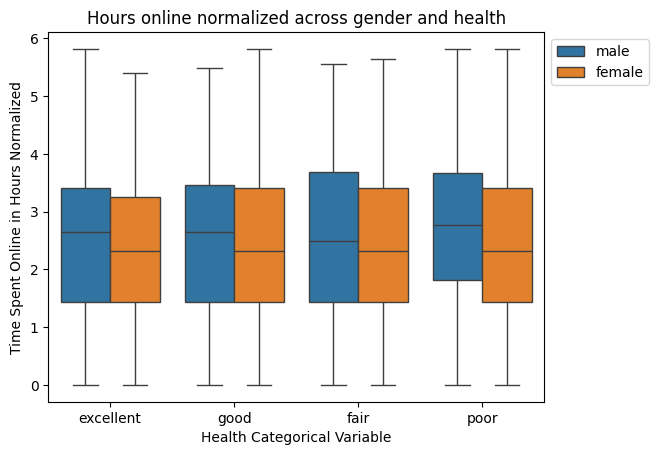

In [82]:
sns.boxplot(x='health', y='hours_online_arcsinh', data=df, hue='sex')
plt.title('Hours online normalized across gender and health')
plt.xlabel('Health Categorical Variable')
plt.ylabel('Time Spent Online in Hours Normalized')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')



Is there a similar distribution of health outcomes to each gender? It appears so

In [86]:
frequency_table_percent = pd.crosstab(df['health'], df['sex'], normalize='columns') * 100
print(frequency_table_percent)

sex           female       male
health                         
excellent  27.234309  26.966292
fair       17.060573  18.052434
good       51.619972  51.722846
poor        4.085146   3.258427
